# DigiProf

DigiProf is a web application that utilizes machine learning to recognize numbers written by children, and vocalizing these numbers into sound using text-to-speech technology. The app is made to help children actively learn and recall numbers by vocalizing what they have written, thus instilling the concept of Autodidacticism or self-learning. We hope to instill a love for learning and curiosity for exploration in children that will guarantee quality education with long term self-teaching habits.

This project is developed by:

- A. P. Dumosmog
- K. M. Quirapas
- D. C. Roxas

This project is inspired by:
Sustainable Development Goals 4 — Quality Education

## 1. Importing the dataset and libraries

In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow 
import keras  
import os
import glob 
from skimage import io
import skimage
import random

from sklearn.preprocessing import OneHotEncoder

## 2. Data Preprocessing

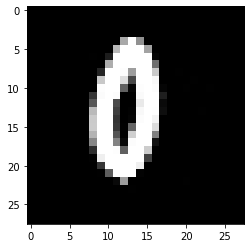

In [207]:
datasetpath = []
generalpath = r".\data"
classnames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Getting the images from the ./data folder
for index in range(10):
    indivpath = os.path.join(dataset_path, class_names[index], "*")
    indivpath = glob.glob(indivpath)
    datasetpath.append(indivpath)

datasetpath = np.ravel(datasetpath)

#Transforming the images to matrices
dataset = []
for i in range(datasetpath.shape[0]):
    image = io.imread(datasetpath[i])
    
    #Convert to grayscale
    grayimage = skimage.color.rgb2gray(image)
    
    #Inverting the grayscale image
    for i in range(grayimage.shape[0]):
        for j in range(grayimage.shape[1]):
            grayimage[i][j] = 1 - grayimage[i][j]
            
    dataset.append(grayimage)

#Normalization
normdataset = []
for image in dataset:
    normimage = (image - np.min(image)) / (np.max(image) - np.min(image))
    normdataset.append(normimage)

#Print a random image from the dataset
rng = random.randint(0, len(normdataset)-1)
sample = normdataset[rng]
fig, ax = plt.subplots(1)
fig.set_figwidth(15)
ax.imshow(sample, cmap = 'gray')

In [208]:
#Creating the X feature and Y target matrices
X = []
for image in normdataset:
    X.append(np.ravel(image))

Y = np.genfromtxt("./data/labels.csv", dtype=np.int32, delimiter=",")

X = np.array(X)
Y = np.array(Y)
Yreshaped = Y.reshape(-1, 1)

#Encoding target vector Y using OneHotEncoder
ohe = OneHotEncoder()
y_hot = ohe.fit_transform(Yreshaped)

X.shape: (140, 784)
y_hot.shape: (140, 10)


## 3. Exploratory Data Analysis

### 3.1 Dataset basic information

In [230]:
df = pd.DataFrame(X)
print("Sample pixels from the dataset\n")
print(df.head())

Sample pixels from the dataset

   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   778  779  780  781  782  783  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]


In [231]:
print("Features matrix X basic information\n")
print(df.info())
print("X shape: "+str(X.shape))

Features matrix X basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 857.6 KB
None
X shape: (140, 784)


In [232]:
df2 = pd.DataFrame(Y)
print("Target vector Y basic information\n")
print(df2.info())
print("y_hot shape: "+str(y_hot.shape))

Target vector Y basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       140 non-null    int32
dtypes: int32(1)
memory usage: 688.0 bytes
None
y_hot shape: (140, 10)


### 3.2 Distribution of Labels

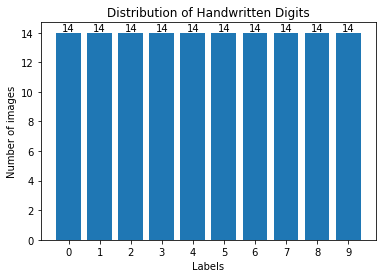

In [233]:
distrib = {}
for i in Y:
    if i not in distrib:
        distrib[i] = 1
    else:
        distrib[i] += 1
#plt.bar(distrib.keys(), distrib.values(), x="Labels", y="Number of images")

fig, ax = plt.subplots()
bars = ax.bar(distrib.keys(), distrib.values())
ax.set_xticks(range(10))
ax.set_xlabel('Labels')
ax.set_ylabel('Number of images')
ax.set_title("Distribution of Handwritten Digits")
ax.bar_label(hbars)

plt.show()

### 3.3 Pixel Intensity

In [234]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,140.0,140.0,140.0,140.000000,140.000000,140.0,140.0,140.0,140.000000,140.000000,...,140.0,140.0,140.000000,140.0,140.000000,140.000000,140.0,140.0,140.0,140.0
mean,0.0,0.0,0.0,0.000028,0.000056,0.0,0.0,0.0,0.000028,0.000168,...,0.0,0.0,0.000056,0.0,0.000028,0.000028,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.000331,0.000467,0.0,0.0,0.0,0.000331,0.000797,...,0.0,0.0,0.000467,0.0,0.000331,0.000331,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.003922,0.003922,0.0,0.0,0.0,0.003922,0.003922,...,0.0,0.0,0.003922,0.0,0.003922,0.003922,0.0,0.0,0.0,0.0


## 4. Data Modeling

## 5. Data Testing